![example](images/director_shot.jpeg)

# Recommendations for a New Movie Studio

**Authors:** Colin Pelzer, Daniel Burdeno, Emiko Naomasa, Piotr Czolpik
***

## Overview

Microsoft wants to create a new original video content creation studio. We utilized data from IMDb and The Numbers; such as, Total Gross, ROI, Run Time, Genres, and Directors. Data was researched, using the Python library Pandas, to perform exploratory analysis into what attributes are currently dominating the film industry, and in order to provide Microsoft reccomendations we used basic data visualization libraries like Matplotlib, and Seaborn.


## Business Problem

Microsoft has expressed interest in going into the original video creation by creating a new movie studio. 
The Studio team has tasked us to explore which types of films are dominating the market, 
and translate them into actionable intel that can help the head of Microsofts new studio make
an informed decision on which films they would like to start to produce.






## Data Understanding

Datasets were scraped from IMDb.com and The-Numbers.com, data from IMDb contains data regarding movie runtime, genre, and directors. The-Numbers dataset contains information relating to worldwide gross and production budget, which allowed us to calculate profit and return on investment(ROI). The dataset also included release dates, which allowed us to calculate the importance of season. We cleaned datasets to only contain information related the last ten years, to insure our reccomendations reflect the current market. Information from both datasets were joined to compare variables against total profit and ROI in order to produce meaningful recommendations.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

In [2]:
df_crew = pd.read_csv('Data/zippedData/imdb.title.crew.csv.gz')
df_name = pd.read_csv('Data/zippedData/imdb.name.basics.csv.gz')
df_title_basic = pd.read_csv('Data/zippedData/imdb.title.basics.csv.gz')
df_num = pd.read_csv('Data/zippedData/tn.movie_budgets.csv.gz')

In [3]:
df_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [4]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [5]:
df_title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Film Crew Information

This dataset contains the unique id number for the crew involved with making the corresponding movies, we used this dataset to obtain the names of film directors.

In [7]:
df_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
df_crew['directors'].value_counts()

nm3266654              62
nm2682776              48
nm5592581              48
nm3583561              46
nm0183659              44
                       ..
nm9831591               1
nm8667182,nm2532802     1
nm6977710               1
nm1934569               1
nm4002079               1
Name: directors, Length: 98525, dtype: int64

Based on the intial look at the data, directors are seperated by a unique id name that we can cross reference with another database to pull their names, and the movies they worked on. We want to pull only movies with a single director, as they represent a majority of the data.

### Director Name Information

Using the information in this dataset, we can extract the name of the director from their unique id associated with them. We can now tie director name to the corresponding movie title's using both the previous and the next dataset (using tconst).

In [9]:
df_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


### Title Basics

This is one of the main datasets that we are going to use to create suggestions, useful information like title, genre, and runtime are all available to us within

In [10]:
df_title_basic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
df_title_basic['start_year'].value_counts()
# Most of the information is from the past 10 years, however there are some funky data points so we will still hard code a limit into the data.

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [12]:
df_title_basic['genres'].value_counts()
#Need to deal with multi-genre movies, and to trim down to the most relevant genres

Documentary                     32185
Drama                           21486
Comedy                           9177
Horror                           4372
Comedy,Drama                     3519
                                ...  
Comedy,Musical,Thriller             1
Adventure,Biography,Thriller        1
Comedy,Sci-Fi,Sport                 1
Comedy,History,Musical              1
Action,Animation,Biography          1
Name: genres, Length: 1085, dtype: int64

 Using the 'tconst' column, we can tie in the other supplementary datasets to include in our analysis. We can start to form questions off of this dataset such as, 'How does runtime affect the rating/ROI' or 'do certain genres dominate the market more than others?'

### The Numbers File

Three of the most important datapoints come from this set, production budget, worldwide gross, and release date. Utlizing production budget and worldwide gross we can compute both net profit and return on investment (ROI). This dataset will be on main set that we merge others into. We will need to trim it down to only contain movies from 2010 and onwards (last 10 years).

In [13]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
df_num['worldwide_gross'].describe()
#All the number data are objects, we will need to convert them to int/float to provide more analysis

count     5782
unique    5356
top         $0
freq       367
Name: worldwide_gross, dtype: object

Its a common idea that movies that come out during the summer and beginning of the holiday season perform better, using this data we can figure out how much it truly affects the total profitability.

## Data Preparation

Initial data preparation ranged between datasets. This included the removal of null values/incomplete entries, the transforming of certain data types into usable fields, and the trimming of data to only contain information from 2010-2021. It also included the creation of several new variables (profit, ROI) as well as the dropping of variables not used. This initial preparation and cleaning was done in order for us to merge all datasets into a final usable data frame from which we can draw meaniful conclusions/recommendations and produce our visuals.


### Film Crew Cleaning

In [15]:
# Delete 'writers' 
df_crew.drop(['writers'], axis=1, inplace=True)

# Drop missing values in 'directors'
df_crew.dropna(axis=0, subset=['directors'], inplace=True)

# Drop duplicate in 'tconst', film id
df_crew.drop_duplicates(subset='tconst', inplace=True)

# Explode out films with multiple directors
df_dir = df_crew.assign(director = df_crew.directors.str.split(',')).explode('director')

# Drop 'directors' column because we have new column
df_dir.drop('directors', axis = 1, inplace=True)

In [16]:
df_dir.head()

,tconst,director
0,tt0285252,nm0899854
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,nm0089502
4,tt0878654,nm2291498


### Director Name Cleaning

In [17]:
# Keep only columns 'nconst', 'primary_name'
df_name = df_name[['nconst', 'primary_name' ]]

# Checking for any null values
df_name.isna().value_counts()

nconst  primary_name
False   False           606648
dtype: int64

In [18]:
# Checking for any duplicate entries
df_name.duplicated().value_counts()

False    606648
dtype: int64

In [19]:
df_name.head()

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


### Title Basics and Genre Cleaning

In [20]:
# Dropping all null values from relevant columns, incomplete entries would create merge conflicts
df_title_basic.dropna(subset = ['original_title', 'genres'])

# Subset data to only include year 2010-2021
df_title_2010 = df_title_basic[(df_title_basic["start_year"] >= 2010) & (df_title_basic["start_year"] <= 2021)] 

# Drop the primary_title column, we will use original_title to avoid as many potential movies with the same name
df_title_final = df_title_2010.drop("primary_title", axis=1)

# Checking for any duplicate entries
df_title_final.duplicated().value_counts()

False    146101
dtype: int64

In [21]:
df_title_final.head()

,tconst,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### The Numbers Cleaning

In [22]:
# Define function to transform money values (object) into usable numbers (float)
def data_cleaning_money(column_name):
    df_num[column_name] = df_num[column_name].str.replace('$', '').str.replace(',', '').astype(float)

# Tranform product_budget and worldwide_gross and drop domestic_gross and id columns
data_cleaning_money('worldwide_gross')
data_cleaning_money('production_budget')
df_num_cleaned = df_num.drop('id', axis = 1)
df_num_cleaned = df_num.drop('domestic_gross', axis = 1)

# Transforming release_date into datetime object for easier use
df_num_cleaned['release_date'] = pd.to_datetime(df_num_cleaned['release_date'])

# Cleaning data and removing any potential null (0.0) values from relevant columns. 
df_num_cleaned = df_num_cleaned[df_num_cleaned['worldwide_gross'] != 0.0]
df_num_cleaned = df_num_cleaned[df_num_cleaned['production_budget'] != 0.0]

In [23]:
# Create new variable 'profit'
df_num_cleaned['profit'] = (df_num_cleaned['worldwide_gross'] - df_num_cleaned['production_budget'])

# Using 'profit' variable, create new variable "ROI" (Return On Investment)
df_num_cleaned['ROI'] = (df_num_cleaned['profit']) / (df_num_cleaned['production_budget'])

#Using all the data that comes after January 1st, 2010
df_num_cleaned.drop(df_num_cleaned[df_num_cleaned['release_date'] < pd.Timestamp(2010, 1, 1)].index, inplace = True)

#Creating month column
df_num_cleaned['month'] = df_num_cleaned['release_date'].dt.month

#Creating month name column using calendar library
df_num_cleaned['month_name'] = df_num_cleaned['month'].apply(lambda x: calendar.month_name[x])

In [24]:
df_num_cleaned.drop(['id', 'release_date', 'month'], axis=1, inplace=True)

In [25]:
df_num_cleaned.head()

,movie,production_budget,worldwide_gross,profit,ROI,month_name
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,1.546673,May
2,Dark Phoenix,350000000.0,1.497624e+08,-2.002376e+08,-0.572108,June
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,3.243841,May
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,9.997217e+08,3.153696,December
5,Star Wars Ep. VII: The Force Awakens,306000000.0,2.053311e+09,1.747311e+09,5.710167,December


### Merging of datasets

Consolidating our dataframes into one to perform our data visualizations/analysis

In [27]:
#Merging the director ids with the director names
df_merge = df_dir.merge(df_name, how = 'inner', left_on = 'director', right_on = 'nconst')

# Join director names back into list for continued merging into next dataset
df_remerge = df_merge.groupby('tconst').agg({'primary_name': lambda x: x.tolist()}).reset_index()

In [28]:
df_remerge.head(20)

,tconst,primary_name
0,tt0063540,[Harnam Singh Rawail]
1,tt0066787,[Mani Kaul]
2,tt0069049,[Orson Welles]
3,tt0069204,[Hrishikesh Mukherjee]
4,tt0100275,"[Valeria Sarmiento, Raoul Ruiz]"
5,tt0111414,[Frank Howson]
6,tt0112502,[Mc Jones]
7,tt0137204,[Anthony Harrison]
8,tt0139613,"[António Loja Neves, José Manuel Alves Pereira]"
9,tt0144449,[Louis van Gasteren]


In [29]:
#second merge, adding director to the df_title data frame
df_merge1 = df_remerge.merge(df_title_final, how = 'inner', left_on = 'tconst', right_on = 'tconst')

#dropping irrelevant data
df_merge1.drop(['tconst', 'start_year'], axis=1, inplace=True)

# Rename director column
df_merge1.rename(columns={'primary_name':'director_name'}, inplace=True)

# Transform genres into list of genres for future explode
df_merge2 = df_merge1.assign(genre = df_merge1.genres.str.split(','))

# Drop genres column that is not a list
df_merge2.drop('genres', axis = 1, inplace=True)

df_merge2.head() 

,director_name,original_title,runtime_minutes,genre
0,[Harnam Singh Rawail],Sunghursh,175.0,"[Action, Crime, Drama]"
1,[Mani Kaul],Ashad Ka Ek Din,114.0,"[Biography, Drama]"
2,[Orson Welles],The Other Side of the Wind,122.0,[Drama]
3,[Hrishikesh Mukherjee],Sabse Bada Sukh,NaN,"[Comedy, Drama]"
4,"[Valeria Sarmiento, Raoul Ruiz]",La Telenovela Errante,80.0,"[Comedy, Drama, Fantasy]"


In [30]:
#final merge, adding the merged datafram on the numbers file
df_merge_final = df_num_cleaned.merge(df_merge2, how = 'inner', left_on = 'movie', right_on = 'original_title')

#dropping similar column
df_merge_final.drop('original_title', axis=1, inplace=True)

df_merge_final.drop_duplicates(subset = ['movie'], inplace=True)

df_merge_final.head()

,movie,production_budget,worldwide_gross,profit,ROI,month_name,director_name,runtime_minutes,genre
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,1.546673,May,[Rob Marshall],136.0,"[Action, Adventure, Fantasy]"
1,Dark Phoenix,350000000.0,1.497624e+08,-2.002376e+08,-0.572108,June,[Simon Kinberg],113.0,"[Action, Adventure, Sci-Fi]"
2,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,3.243841,May,[Joss Whedon],141.0,"[Action, Adventure, Sci-Fi]"
3,Avengers: Infinity War,300000000.0,2.048134e+09,1.748134e+09,5.827114,April,"[Anthony Russo, Joe Russo]",149.0,"[Action, Adventure, Sci-Fi]"
4,Justice League,300000000.0,6.559452e+08,3.559452e+08,1.186484,November,[Zack Snyder],120.0,"[Action, Adventure, Fantasy]"


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
df_merge_final.plot.scatter('production_budget', 'ROI');

In [ ]:
df_merge_final.plot.scatter('production_budget', 'profit');

In [ ]:
df_merge_final.plot.scatter('runtime_minutes', 'profit');

In [ ]:
df_merge_final.plot.scatter('runtime_minutes', 'ROI');

In [ ]:
df_merge_final.plot.scatter('worldwide_gross', 'ROI');

In [ ]:
df_merge_final.plot.scatter('month_name', 'ROI')
plt.xticks(rotation=70);

In [ ]:
df_merge_final.plot.scatter('genre1', 'ROI')
plt.xticks(rotation=90);

In [98]:
df_genre = df_merge_final.explode('genre')
df_genre.drop('director_name', axis = 1, inplace=True)

In [107]:
df_genre_top = df_genre.groupby(by='genre').mean().reset_index().sort_values(by = 'ROI', ascending = False)

In [108]:
df_genre_top.head(10)

,genre,production_budget,worldwide_gross,profit,ROI,runtime_minutes
14,Mystery,2.395880e+07,8.661282e+07,6.265402e+07,9.322094,105.604651
11,Horror,1.749693e+07,6.638067e+07,4.888374e+07,8.726548,97.530726
18,Thriller,3.120796e+07,1.069024e+08,7.569447e+07,5.884610,105.265152
15,Romance,2.102584e+07,6.225014e+07,4.122430e+07,2.659392,106.589623
17,Sport,2.647500e+07,8.757090e+07,6.109590e+07,2.578671,110.437500
16,Sci-Fi,8.938528e+07,3.212131e+08,2.318278e+08,2.576448,114.954887
2,Animation,9.141667e+07,3.409232e+08,2.495065e+08,2.457954,94.000000
4,Comedy,3.817925e+07,1.264128e+08,8.823350e+07,2.326252,102.425926
12,Music,1.674944e+07,6.771147e+07,5.096202e+07,2.225392,104.870370
3,Biography,2.415852e+07,7.189215e+07,4.773362e+07,2.127455,115.489933


In [116]:
#df_genre = df_genre.groupby(by='genre').mean().reset_index()
df_genre_final = df_genre.sort_values(by = 'ROI', ascending = False)
df_genre_final

,movie,production_budget,worldwide_gross,profit,ROI,month_name,runtime_minutes,genre
2172,The Gallows,100000.0,41656474.0,41556474.0,415.564740,July,81.0,Thriller
2172,The Gallows,100000.0,41656474.0,41556474.0,415.564740,July,81.0,Horror
2172,The Gallows,100000.0,41656474.0,41556474.0,415.564740,July,81.0,Mystery
2058,The Devil Inside,1000000.0,101759490.0,100759490.0,100.759490,January,NaN,Thriller
2058,The Devil Inside,1000000.0,101759490.0,100759490.0,100.759490,January,NaN,Horror
...,...,...,...,...,...,...,...,...
2095,Food Chains,913000.0,176.0,-912824.0,-0.999807,November,83.0,Documentary
1573,Skin Trade,9000000.0,1242.0,-8998758.0,-0.999862,May,78.0,Documentary
2091,American Hero,1000000.0,26.0,-999974.0,-0.999974,December,86.0,Action
2091,American Hero,1000000.0,26.0,-999974.0,-0.999974,December,86.0,Drama


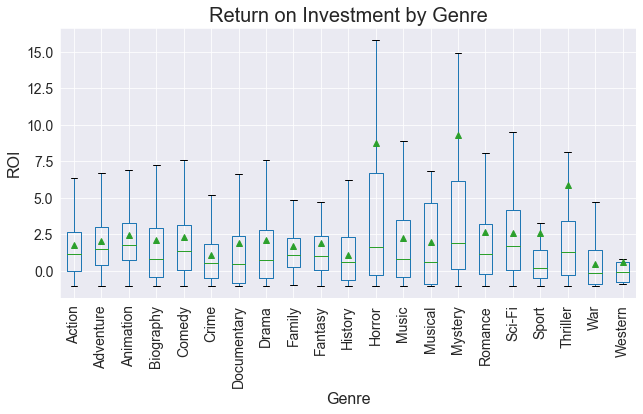

In [117]:
sns.set_style('darkgrid')

fig_box1 = df_genre_final.boxplot(
    column='ROI', by='genre', fontsize=14, figsize=(10,5), rot=90, 
        showfliers=False, showmeans=True, showbox=True)


fig_box1.set_ylabel('ROI' , fontsize=16)
fig_box1.set_xlabel('Genre' , fontsize=16)
fig_box1.set_title('Return on Investment by Genre' , fontsize=20)
plt.suptitle('');

In [86]:
df_directors = df_merge_final.explode('director_name')
df_directors = df_directors.explode('genre')
df_directors = df_directors[df_directors['genre'] == 'Horror']
df_directors = df_directors.groupby(by='director_name').sum().reset_index()

In [90]:
df_directors.sort_values(by = 'profit', inplace=True, ascending = False)


In [93]:
df_directors_top = df_directors.head(20)
df_directors_top

,director_name,production_budget,worldwide_gross,profit,ROI,runtime_minutes
123,Paul W.S. Anderson,162500000.0,850623009.0,688123009.0,13.700439,298.0
9,Andy Muschietti,35000000.0,697457969.0,662457969.0,18.927371,135.0
64,James Wan,21500000.0,417871027.0,396371027.0,80.480598,215.0
81,Jon Turteltaub,178000000.0,529530715.0,351530715.0,1.974892,113.0
99,Marc Forster,190000000.0,531514650.0,341514650.0,1.797446,116.0
11,Ariel Schulman,10000000.0,349857836.0,339857836.0,67.971567,171.0
60,Henry Joost,10000000.0,349857836.0,339857836.0,67.971567,171.0
63,James DeMonaco,22000000.0,321316189.0,299316189.0,51.666431,296.0
32,David F. Sandberg,15000000.0,305384865.0,290384865.0,19.358991,109.0
79,John R. Leonetti,18500000.0,280340265.0,261840265.0,39.473818,189.0


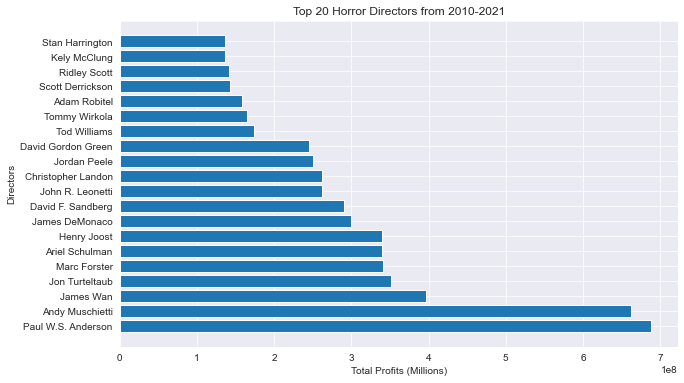

In [118]:
fig_dir, ax = plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")

plt.barh(df_directors_top['director_name'], df_directors_top['profit'])
plt.title('Top 20 Horror Directors from 2010-2021')
plt.xlabel('Total Profits (Millions)')
plt.ylabel('Directors')
plt.savefig('Images/directors.png', bbox_inches = 'tight');

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***